In [33]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
train_file = h5py.File("/Volumes/MacOS/Research/training_data_2054494.h5", "r")

In [3]:
X_train = train_file['features']
y_train = train_file['targets']


In [4]:
print(X_train.shape)
len(X_train)

(2054494, 32, 32, 1)


2054494

In [5]:
N_train = len(X_train)
#N_train = 10000
train_images=np.array(X_train[0:N_train])
train_labels=np.array(y_train[0:N_train])

In [6]:
class_names = ['Background', 'SVJ']

In [7]:
train_images_sum = train_images.sum(axis=(1,2),keepdims=True)

In [8]:
# test whether we calculation summation of each images correctly
print(train_images_sum.shape)

print(np.sum(train_images[0,:,:,0]) == train_images_sum[0,0,0,0])
print(np.sum(train_images[1,:,:,0]) == train_images_sum[1,0,0,0])

(2054494, 1, 1, 1)
True
True


In [9]:
nor_train_images = train_images/train_images_sum
# By this way we give each image same weight

In [10]:
print(np.sum(nor_train_images[:,:,:,0]) == len(train_images))


True


In [11]:
# test whether we rescale each images correctly
print(np.sum(nor_train_images[0,:,:,0]))
print(np.sum(nor_train_images[1,:,:,0]))

1.0
1.0


In [12]:
# Seperate sig/bkg
nor_sig = np.zeros((32,32))
nor_bkg = np.zeros((32,32))

sig_index = np.where(train_labels == 1)
bkg_index = np.where(train_labels == 0)

for i in range(len(sig_index[0])):
  nor_sig += nor_train_images[sig_index[0][i],:,:,0]

for i in range(len(bkg_index[0])):
  nor_bkg += nor_train_images[bkg_index[0][i],:,:,0]


In [14]:
print(np.sum(nor_sig))
print(len(sig_index[0]))
print(len(bkg_index[0]))

889245.0000000047
889245
1165249


Text(0.5, 0, 'Background')

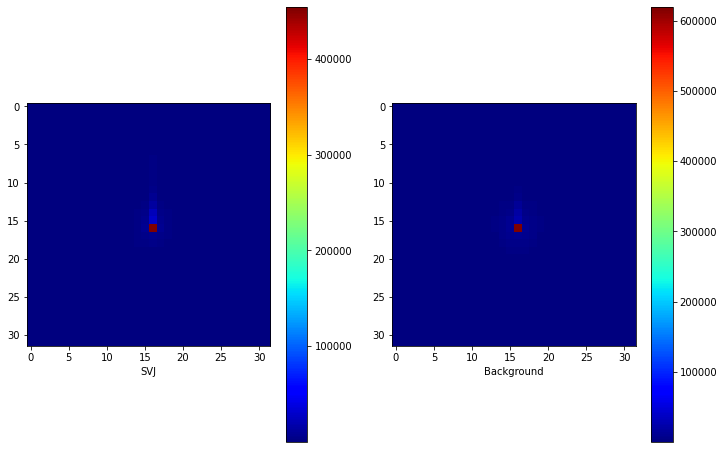

In [45]:
# Plot the sig/bkg images 
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(nor_sig, cmap='jet')
plt.colorbar()
plt.xlabel(class_names[1])

plt.subplot(1,2,2)
plt.imshow(nor_bkg, cmap='jet')
plt.colorbar()
plt.xlabel(class_names[0])

Text(0.5, 0, 'Background')

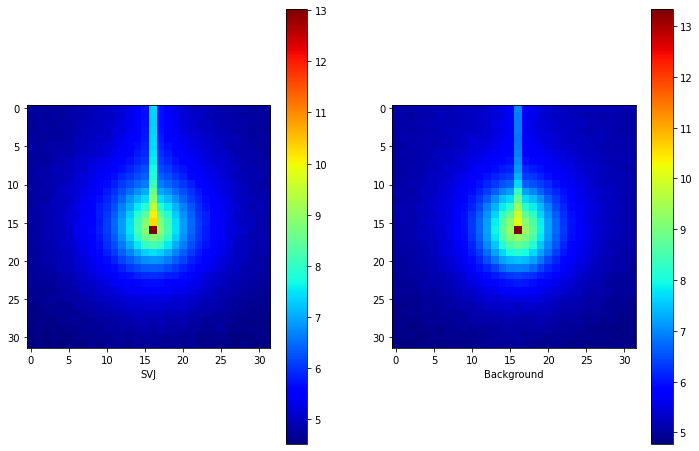

In [15]:
# Plot the sig/bkg images in log scale 
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(np.log(1.0+ nor_sig), cmap='jet')
plt.colorbar()
plt.xlabel(class_names[1])

plt.subplot(1,2,2)
plt.imshow(np.log(1.0+ nor_bkg), cmap='jet')
plt.colorbar()
plt.xlabel(class_names[0])

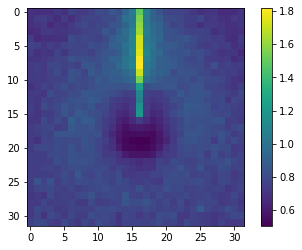

In [17]:
# Plot the ratio of sig/background
ratio = nor_sig/nor_bkg
plt.imshow(ratio)
plt.colorbar()


In [35]:
# Compare the avg images using same normalization method 
# https://github.com/taylorFaucett/semi-visible-jets-ml/blob/master/analysis/CNN/explore_data.ipynb

sig = np.zeros((32,32))
bkg = np.zeros((32,32))

for i in range(len(sig_index[0])):
  sig += train_images[sig_index[0][i],:,:,0]

for i in range(len(bkg_index[0])):
  bkg += train_images[bkg_index[0][i],:,:,0]



Text(0.5, 0, 'Background')

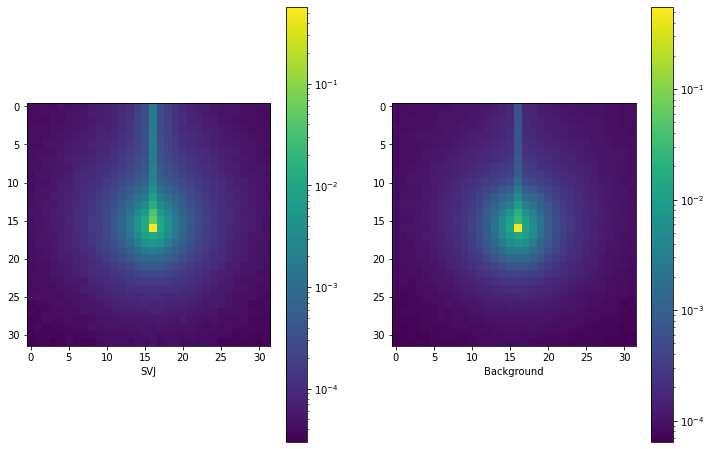

In [37]:
# Plot the sig/bkg images in log scale 
nor2_sig = sig/np.sum(sig)
nor2_bkg = bkg/np.sum(bkg)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow((nor2_sig), norm=matplotlib.colors.LogNorm()) #Normalize a given value to the 0-1 range on a log scale.
plt.colorbar()
plt.xlabel(class_names[1])

plt.subplot(1,2,2)
plt.imshow((nor2_bkg), norm=matplotlib.colors.LogNorm()) 
plt.colorbar()
plt.xlabel(class_names[0])

Not consistent with the pictures: 

https://github.com/taylorFaucett/semi-visible-jets-ml/blob/master/figures/SVJ.pdf
https://github.com/taylorFaucett/semi-visible-jets-ml/blob/master/figures/QCD.pdf

Text(0.5, 0, 'Background')

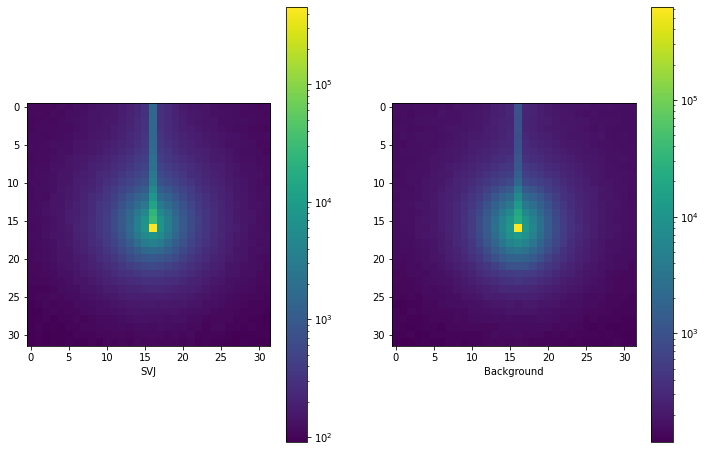

In [39]:

# Plot the sig/bkg images in log scale 
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(nor_sig, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel(class_names[1])

plt.subplot(1,2,2)
plt.imshow(nor_bkg, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel(class_names[0])

In [43]:
nor_sig/len(sig) - nor2_sig 

array([[3.56464465, 3.46853978, 3.50736255, ..., 3.67766647, 3.52413608,
        3.70881264],
       [3.5464492 , 3.68281174, 3.56301527, ..., 3.60437787, 3.62776097,
        3.56880484],
       [3.37992243, 3.54974557, 3.65831325, ..., 3.7192873 , 3.57055118,
        3.64277547],
       ...,
       [2.96839728, 3.15849387, 2.99364969, ..., 3.22204848, 3.07007285,
        2.95149189],
       [2.8765407 , 3.12096352, 2.89805645, ..., 3.02241774, 3.07412364,
        3.05921909],
       [2.89673845, 3.03845321, 2.9058635 , ..., 2.9891674 , 2.88852303,
        2.82803733]])

In [44]:
nor_sig/len(sig)

array([[3.5646832 , 3.46857941, 3.50740628, ..., 3.67771045, 3.52418098,
        3.70885838],
       [3.54649116, 3.68285543, 3.56306086, ..., 3.60442264, 3.62780338,
        3.56884452],
       [3.37996406, 3.54978667, 3.65835406, ..., 3.71933313, 3.57059234,
        3.64281948],
       ...,
       [2.96843466, 3.15853544, 2.99368506, ..., 3.22208901, 3.07011159,
        2.95152929],
       [2.8765729 , 3.12100063, 2.89809351, ..., 3.0224549 , 3.0741588 ,
        3.05925306],
       [2.89677113, 3.03848895, 2.9058979 , ..., 2.98920377, 2.88855522,
        2.8280715 ]])

In [42]:
nor2_sig

array([[3.85409546e-05, 3.96343586e-05, 4.37344055e-05, ...,
        4.39757276e-05, 4.49039461e-05, 4.57335240e-05],
       [4.19573632e-05, 4.36807664e-05, 4.55896320e-05, ...,
        4.47645063e-05, 4.24118404e-05, 3.96795359e-05],
       [4.16337030e-05, 4.11006879e-05, 4.08115407e-05, ...,
        4.58362522e-05, 4.11597345e-05, 4.40080822e-05],
       ...,
       [3.73825370e-05, 4.15735827e-05, 3.53711734e-05, ...,
        4.05301418e-05, 3.87418542e-05, 3.73982680e-05],
       [3.22068377e-05, 3.71179535e-05, 3.70660626e-05, ...,
        3.71612225e-05, 3.51677272e-05, 3.39655864e-05],
       [3.26881033e-05, 3.57405767e-05, 3.44032310e-05, ...,
        3.63646736e-05, 3.21946057e-05, 3.41751845e-05]])